1. IMPLEMENT LIBRARY

In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,ElasticNet,Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix

2. PREPARE DATA

In [69]:
df =pd.read_csv("InputData.csv")
df

,Unnamed: 0,AGE07,EDCL07,MARRIED07,KIDS07,LIFECL07,OCCAT107,INCOME07,RISK07,WSAVED07,SPENDMOR07,NETWORTH07,TrueRiskTol
0,0,47,2,1,0,2,1,56443.744181,3,1,5,352641.71130,6.947439
1,1,47,2,1,0,2,1,56443.744181,3,1,5,340525.21881,6.223158
2,2,47,2,1,0,2,1,56443.744181,3,1,5,348696.08426,6.676709
3,3,47,2,1,0,2,1,56443.744181,3,1,5,351802.87720,6.286854
4,4,47,2,1,0,2,1,56443.744181,3,1,5,358958.85696,6.177016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,19280,50,4,2,0,1,2,78808.246592,2,2,5,653876.35532,5.978830
4806,19281,50,4,2,0,1,2,78808.246592,2,2,5,655843.99086,5.941754
4807,19282,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461
4808,19283,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461


In [70]:
df.rename(columns={"Unnamed: 0":"id" , "AGE07":"age" , "EDCL07":"education_level" ,"MARRIED07":"married_state" , "KIDS07":"no_of_kids" ,
                   "LIFECL07":"life_statge" , "OCCAT107":"occupational_category" , "INCOME07":"income" , "RISK07":"risk", 
                   "WSAVED07":"wealth_saved" , "SPENDMOR07":"spend_amount" , "NETWORTH07":"net_worth" , "TrueRiskTol":"risk_tol"} ,inplace=True)

In [71]:
df

,id,age,education_level,married_state,no_of_kids,life_statge,occupational_category,income,risk,wealth_saved,spend_amount,net_worth,risk_tol
0,0,47,2,1,0,2,1,56443.744181,3,1,5,352641.71130,6.947439
1,1,47,2,1,0,2,1,56443.744181,3,1,5,340525.21881,6.223158
2,2,47,2,1,0,2,1,56443.744181,3,1,5,348696.08426,6.676709
3,3,47,2,1,0,2,1,56443.744181,3,1,5,351802.87720,6.286854
4,4,47,2,1,0,2,1,56443.744181,3,1,5,358958.85696,6.177016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,19280,50,4,2,0,1,2,78808.246592,2,2,5,653876.35532,5.978830
4806,19281,50,4,2,0,1,2,78808.246592,2,2,5,655843.99086,5.941754
4807,19282,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461
4808,19283,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461


3. DATA WRANGLING

ARE THERE MISSING VALUES?

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4810 non-null   int64  
 1   age                    4810 non-null   int64  
 2   education_level        4810 non-null   int64  
 3   married_state          4810 non-null   int64  
 4   no_of_kids             4810 non-null   int64  
 5   life_statge            4810 non-null   int64  
 6   occupational_category  4810 non-null   int64  
 7   income                 4810 non-null   float64
 8   risk                   4810 non-null   int64  
 9   wealth_saved           4810 non-null   int64  
 10  spend_amount           4810 non-null   int64  
 11  net_worth              4810 non-null   float64
 12  risk_tol               4810 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 488.6 KB


In [73]:
df.describe()

,id,age,education_level,married_state,no_of_kids,life_statge,occupational_category,income,risk,wealth_saved,spend_amount,net_worth,risk_tol
count,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.00000,4810.000000,4.810000e+03,4810.000000,4810.000000,4810.000000,4.810000e+03,4810.000000
mean,9915.072349,55.513721,3.311850,1.207277,0.769647,4.11185,1.708732,1.175117e+06,2.833056,2.616424,3.530146,1.870233e+07,10.778694
std,5662.856824,13.512250,0.960893,0.405397,1.094113,1.50923,0.829500,4.990972e+06,0.808942,0.674415,1.306774,8.159961e+07,15.853115
min,0.000000,22.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,-5.633237e+06,0.450112
25%,4927.250000,45.250000,2.000000,1.000000,0.000000,3.00000,1.000000,6.496355e+04,2.000000,2.000000,2.000000,2.139545e+05,1.032562
50%,10175.500000,56.000000,4.000000,1.000000,0.000000,5.00000,1.000000,1.160824e+05,3.000000,3.000000,4.000000,7.159087e+05,4.047974
75%,14831.750000,65.000000,4.000000,1.000000,1.000000,5.00000,2.000000,3.237528e+05,3.000000,3.000000,5.000000,4.333743e+06,13.620327
max,19284.000000,95.000000,4.000000,2.000000,7.000000,6.00000,4.000000,6.838213e+07,4.000000,3.000000,5.000000,1.451956e+09,98.604330


DROP THE UNUSEFULL FEATURE

In [74]:
df.drop(["id"]  ,axis=1, inplace=True)

UNDERSTANDING DATA BY VISULAIZATION

<AxesSubplot:xlabel='age', ylabel='risk_tol'>

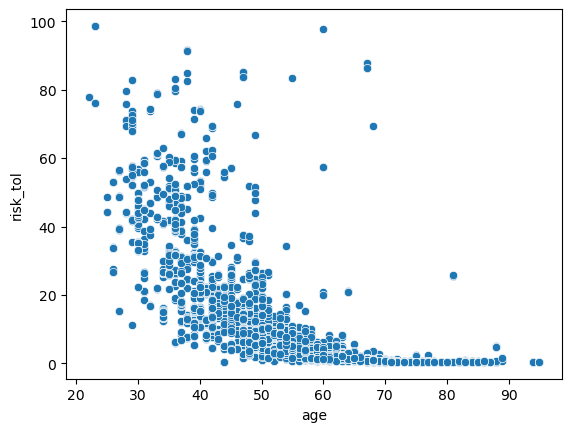

In [75]:
sns.scatterplot(x="age" , y="risk_tol" , data= df)

yes, as we see the younger people can endures high risk

<AxesSubplot:xlabel='education_level', ylabel='risk_tol'>

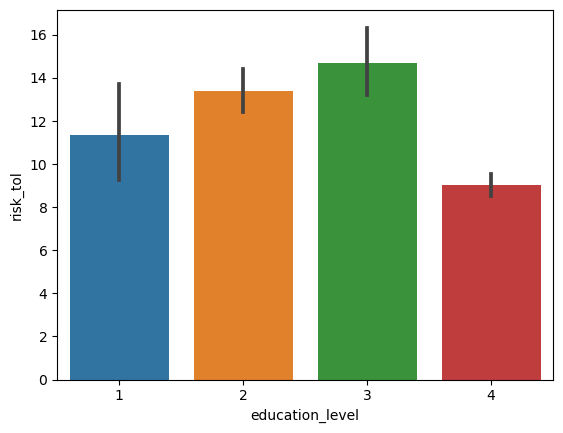

In [76]:
sns.barplot(x="education_level" , y="risk_tol" , data= df)

In [77]:
df["education_level"].value_counts()

4    2964
2     984
3     622
1     240
Name: education_level, dtype: int64

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='income'>

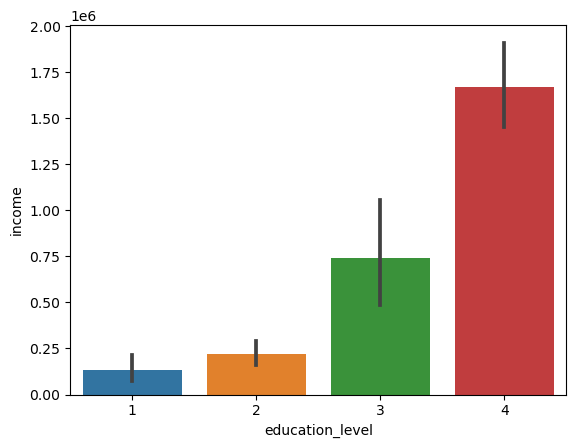

In [78]:
sns.barplot(df["education_level"] , df["income"])

level 4 the biggest income ?? how it appears as the less risk :)

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='age'>

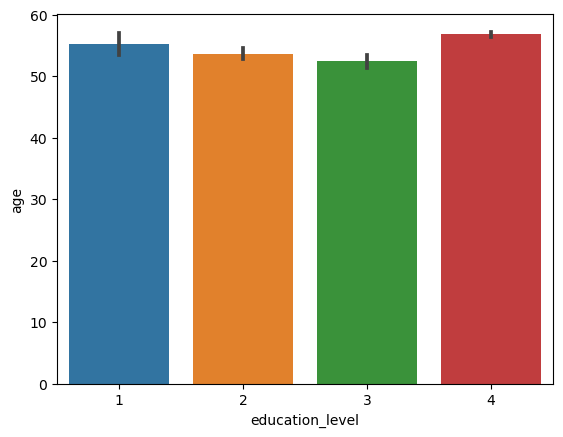

In [79]:
sns.barplot(df["education_level"] , df["age"])

<AxesSubplot:xlabel='married_state', ylabel='risk_tol'>

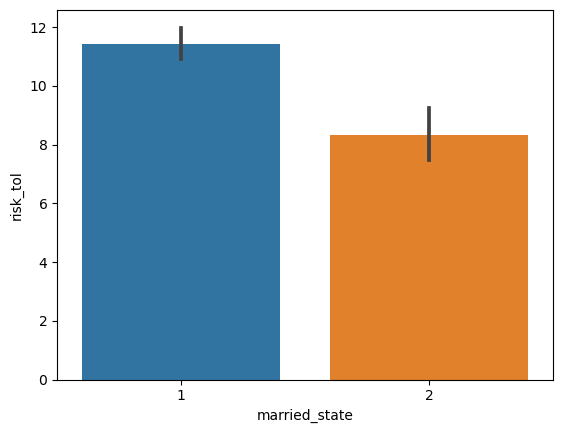

In [80]:
sns.barplot(x="married_state" , y="risk_tol" , data= df)

1 represents married state ,but is this true the married people endures high risk? 

<AxesSubplot:xlabel='married_state', ylabel='income'>

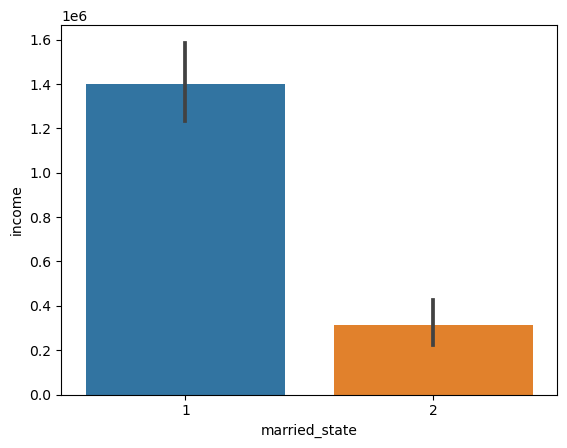

In [81]:
sns.barplot(x="married_state" , y="income" , data= df)

<AxesSubplot:xlabel='no_of_kids', ylabel='risk_tol'>

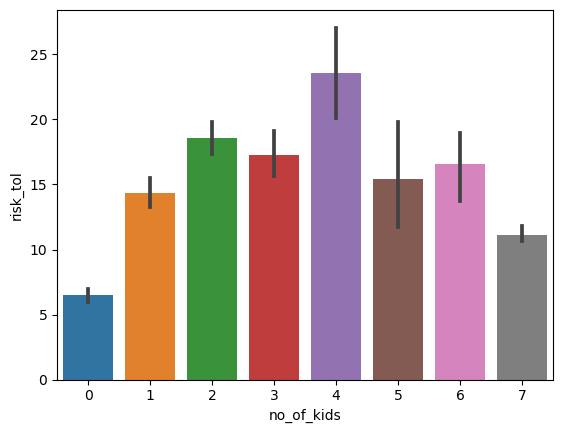

In [82]:
sns.barplot(x="no_of_kids" , y="risk_tol" , data= df)

if the no.of.kids increase the risk tol must decrease. is this true always?

<AxesSubplot:xlabel='married_state', ylabel='no_of_kids'>

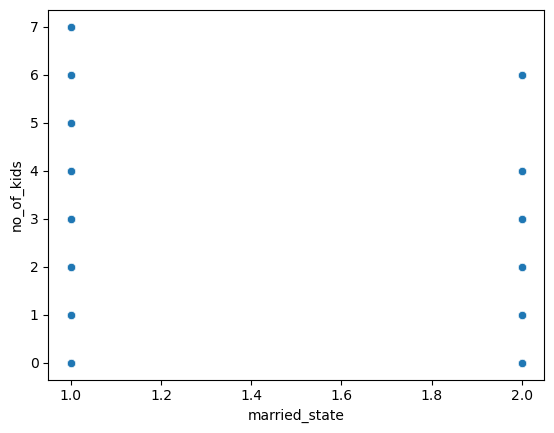

In [83]:
sns.scatterplot(y="no_of_kids" , x="married_state" , data= df)

In [84]:
df[df["married_state"]==2].nunique()

age                       60
education_level            4
married_state              1
no_of_kids                 6
life_statge                4
occupational_category      4
income                   230
risk                       4
wealth_saved               3
spend_amount               5
net_worth                740
risk_tol                 793
dtype: int64

how?????? unmarried has kids it may be Divorced!?

<AxesSubplot:xlabel='life_statge', ylabel='risk_tol'>

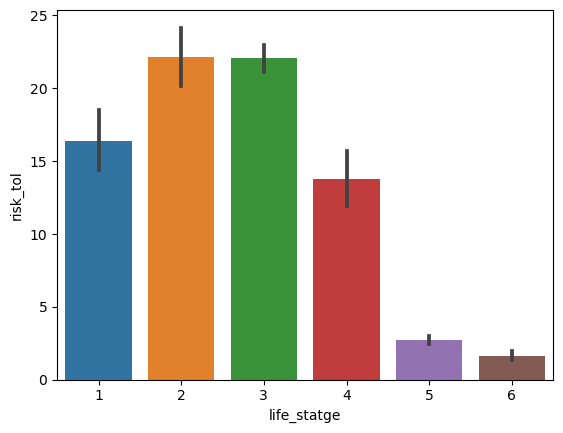

In [85]:
sns.barplot(x="life_statge" , y="risk_tol" , data= df)

as see at level 5,6 the older people can't endures high risk

<AxesSubplot:xlabel='life_statge', ylabel='age'>

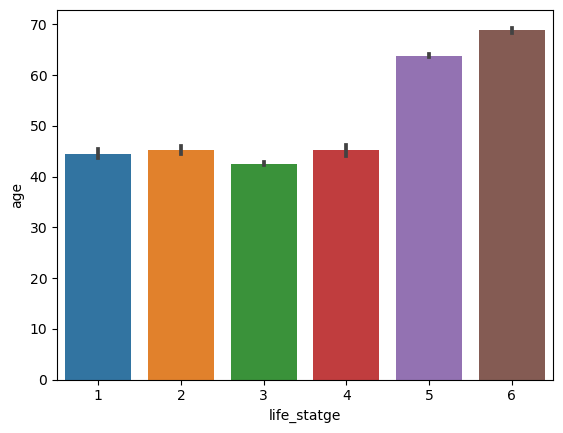

In [86]:
sns.barplot(x="life_statge" , y="age" , data= df)

i make sure that is life statge represent the Ages :))

<AxesSubplot:xlabel='occupational_category', ylabel='risk_tol'>

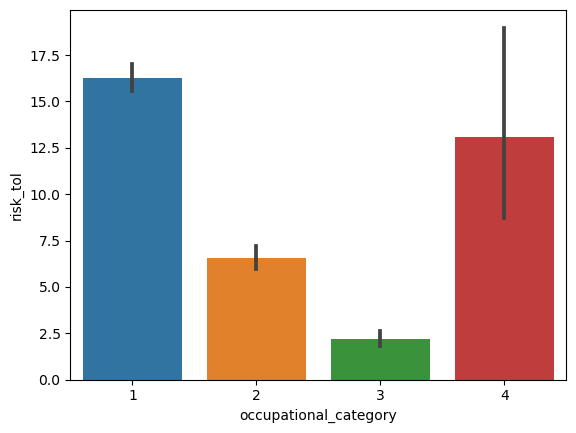

In [87]:
sns.barplot(x="occupational_category" , y="risk_tol" , data= df)

4 represents unemployed , how they can endures high risk??

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='income'>

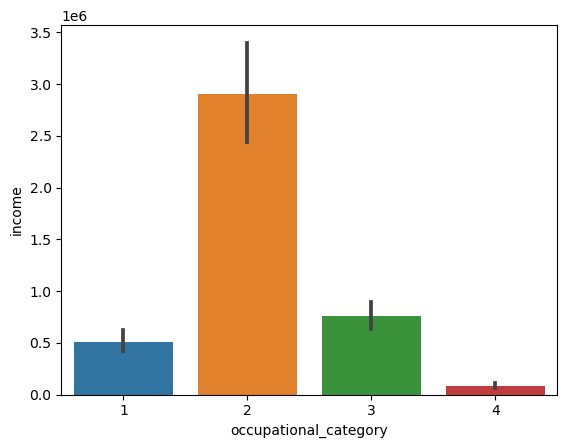

In [88]:
sns.barplot(df["occupational_category"] ,df["income"])

level 4 (unemployed) their income is so small , but this still not true for them to endures high risk

<AxesSubplot:xlabel='income', ylabel='risk_tol'>

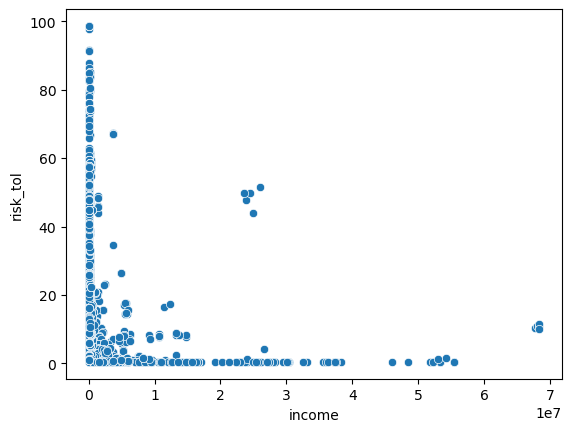

In [89]:
sns.scatterplot(x="income" , y="risk_tol" , data= df)

<AxesSubplot:xlabel='risk', ylabel='risk_tol'>

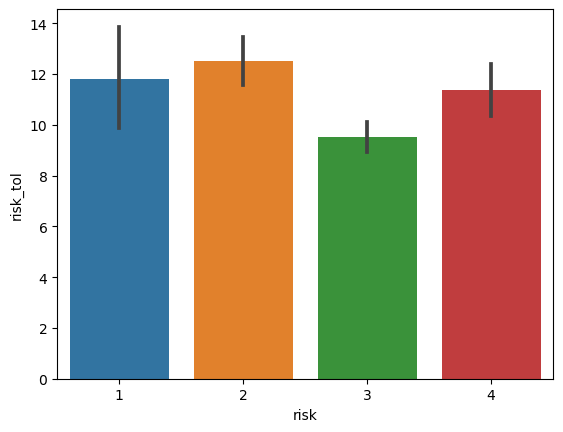

In [90]:
sns.barplot(x="risk" , y="risk_tol" , data= df)

In [91]:
df["risk"].value_counts()

3    2348
2    1223
4     966
1     273
Name: risk, dtype: int64

<AxesSubplot:xlabel='wealth_saved', ylabel='risk_tol'>

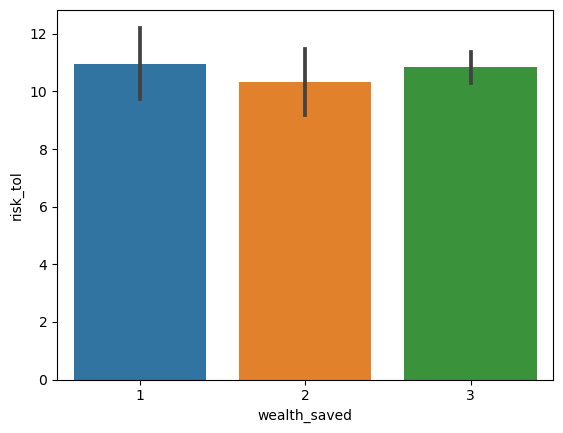

In [92]:
sns.barplot(x="wealth_saved" , y="risk_tol" , data= df)

<AxesSubplot:xlabel='spend_amount', ylabel='risk_tol'>

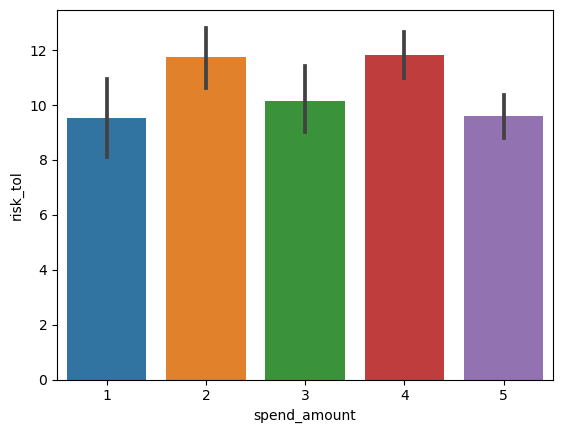

In [93]:
sns.barplot(x="spend_amount" , y="risk_tol" , data= df)

<AxesSubplot:xlabel='net_worth', ylabel='risk_tol'>

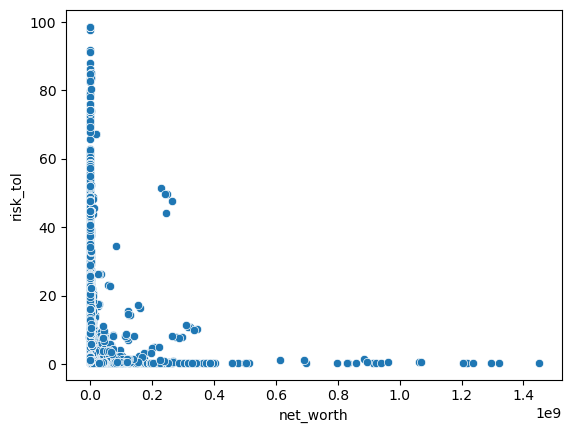

In [94]:
sns.scatterplot(x="net_worth" , y="risk_tol" , data= df)

<AxesSubplot:xlabel='net_worth', ylabel='income'>

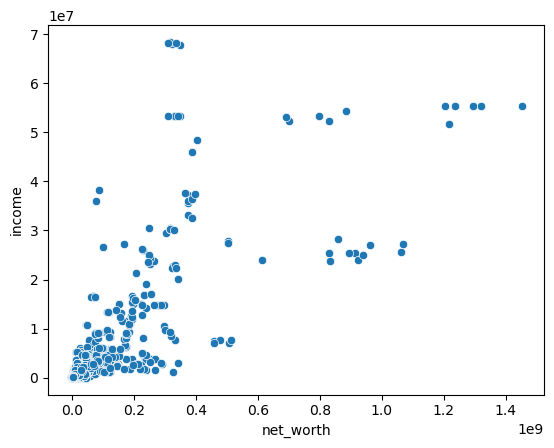

In [95]:
sns.scatterplot(x="net_worth" , y="income" , data= df)

that is true net worth related to income

<AxesSubplot:>

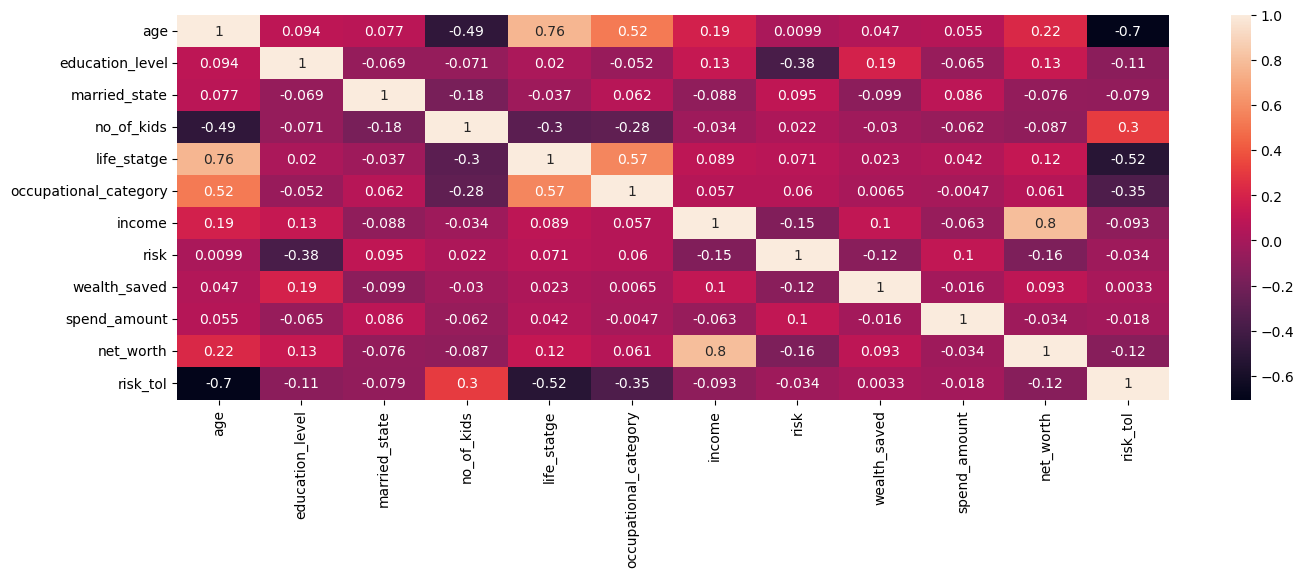

In [96]:
plt.figure(figsize=((16,5)))
sns.heatmap(df.corr() , annot=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4810 non-null   int64  
 1   education_level        4810 non-null   int64  
 2   married_state          4810 non-null   int64  
 3   no_of_kids             4810 non-null   int64  
 4   life_statge            4810 non-null   int64  
 5   occupational_category  4810 non-null   int64  
 6   income                 4810 non-null   float64
 7   risk                   4810 non-null   int64  
 8   wealth_saved           4810 non-null   int64  
 9   spend_amount           4810 non-null   int64  
 10  net_worth              4810 non-null   float64
 11  risk_tol               4810 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 451.1 KB


4. Evaluate Algorithms and Models

In [98]:
x = df.drop(["risk_tol"] , axis=1)
y = df["risk_tol"]

In [99]:
#scaler  = StandardScaler()
#x_scale = scaler.fit_transform(x)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Compare Models and Algorithms


In [101]:
'''models={'LinearRegression': LinearRegression() , 'RandomForestRegressor':RandomForestRegressor(),
        'AdaBoostRegressor':AdaBoostRegressor(), 'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(), 'KNeighborsRegressor':KNeighborsRegressor()
        }
results = []
names = []
for name,model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv =kfold)
    print(model) 
    names.append(name)
    results.append(cv_results.mean())'''

"models={'LinearRegression': LinearRegression() , 'RandomForestRegressor':RandomForestRegressor(),\n        'AdaBoostRegressor':AdaBoostRegressor(), 'GradientBoostingRegressor':GradientBoostingRegressor(),\n        'DecisionTreeRegressor':DecisionTreeRegressor(), 'KNeighborsRegressor':KNeighborsRegressor()\n        }\nresults = []\nnames = []\nfor name,model in models.items():\n    kfold = KFold(n_splits=10, shuffle=True, random_state=42)\n    cv_results = cross_val_score(model, x_train, y_train, cv =kfold)\n    print(model) \n    names.append(name)\n    results.append(cv_results.mean())"

In [102]:
'''plt.figure(figsize=((18,5)))
sns.barplot(names , results) 
plt.xlabel('name of models')
plt.ylabel('accuracy')'''

"plt.figure(figsize=((18,5)))\nsns.barplot(names , results) \nplt.xlabel('name of models')\nplt.ylabel('accuracy')"

5. Model Tuning and Grid Search

In [103]:
'''
models={ 'RF':RandomForestRegressor(),'DT':DecisionTreeRegressor()}

RF_parm=  {'n_estimators':[50,100,200,300],'criterion':['absolute_error','squared_error'],'max_depth':[3,5,7]}
DT_parm = {'criterion':['absolute_error','squared_error'],'splitter':['random','best']}
params = {'RF':RF_parm,'DT':DT_parm}
results = []
names = []
max_score=0
max_model=None
max_model_params=[]

for name,model in models.items():
    gs = GridSearchCV(estimator=model,param_grid=params[name],cv=5)
    a = gs.fit(x_train,y_train)
    score = gs.score(x_test,y_test)

    if score > max_score:
        max_score = score
        max_model = gs.best_estimator_
        max_model_params = gs.best_params_
    
    names.append(name)
    results.append(score)
'''

"\nmodels={ 'RF':RandomForestRegressor(),'DT':DecisionTreeRegressor()}\n\nRF_parm=  {'n_estimators':[50,100,200,300],'criterion':['absolute_error','squared_error'],'max_depth':[3,5,7]}\nDT_parm = {'criterion':['absolute_error','squared_error'],'splitter':['random','best']}\nparams = {'RF':RF_parm,'DT':DT_parm}\nresults = []\nnames = []\nmax_score=0\nmax_model=None\nmax_model_params=[]\n\nfor name,model in models.items():\n    gs = GridSearchCV(estimator=model,param_grid=params[name],cv=5)\n    a = gs.fit(x_train,y_train)\n    score = gs.score(x_test,y_test)\n\n    if score > max_score:\n        max_score = score\n        max_model = gs.best_estimator_\n        max_model_params = gs.best_params_\n    \n    names.append(name)\n    results.append(score)\n"

In [104]:
'''sns.barplot(names , results ) 
plt.xlabel('name of models')
plt.ylabel('accuracy')'''

"sns.barplot(names , results ) \nplt.xlabel('name of models')\nplt.ylabel('accuracy')"

In [105]:
#max_model_params

In [106]:
model = DecisionTreeRegressor(criterion= 'absolute_error', splitter='random')
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9999947420376275

In [107]:
model.score(x_test,y_test)

0.9724049624044178

6. confusion matrix

['Low' 'Low' 'Low' ... 'Low' 'Low' 'Low']
['Low' 'Low' 'Low' ... 'Low' 'Low' 'Low']
[[4373    3    1]
 [   0  349    1]
 [   0    0   83]]


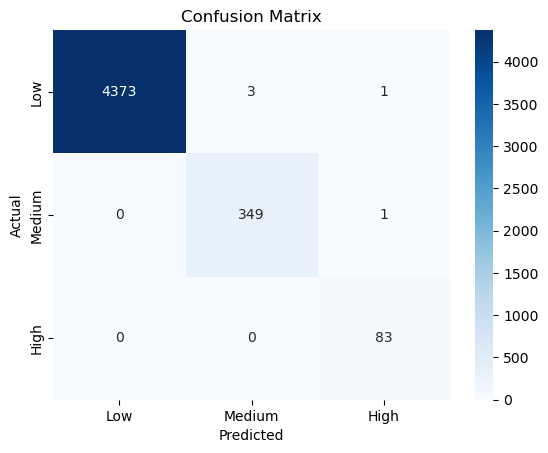

In [108]:
threshold_low = 33.3
threshold_high = 66.6

# Function to categorize values
def categorize(value):
    if value <= threshold_low:
        return 'Low'
    elif value > threshold_low and value <= threshold_high:
        return 'Medium'
    else:
        return 'High'
    
actual_output = y
predicted_output = model.predict(x)

actual_categories = np.array([categorize(value) for value in actual_output])
print (actual_categories)
predicted_categories = np.array([categorize(value) for value in predicted_output])
print (predicted_categories)
conf_matrix = confusion_matrix(actual_categories, predicted_categories, labels=['Low', 'Medium', 'High'])

print (conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [109]:
count_low = np.count_nonzero(actual_categories == 'Low')
count_medium = np.count_nonzero(actual_categories == 'Medium')
count_high = np.count_nonzero(actual_categories == 'High')

print("Number of 'Low' instances:", count_low)
print("Number of 'Medium' instances:", count_medium)
print("Number of 'High' instances:", count_high)

Number of 'Low' instances: 4377
Number of 'Medium' instances: 350
Number of 'High' instances: 83


In [110]:
count_predicted_low = np.count_nonzero(predicted_categories == 'Low')
count_predicted_medium = np.count_nonzero(predicted_categories == 'Medium')
count_predicted_high = np.count_nonzero(predicted_categories == 'High')

print("Number of predicted 'Low' instances:", count_predicted_low)
print("Number of predicted 'Medium' instances:", count_predicted_medium)
print("Number of predicted 'High' instances:", count_predicted_high)

Number of predicted 'Low' instances: 4373
Number of predicted 'Medium' instances: 352
Number of predicted 'High' instances: 85


FEATURE ENGINEERING

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='risk_tol'>

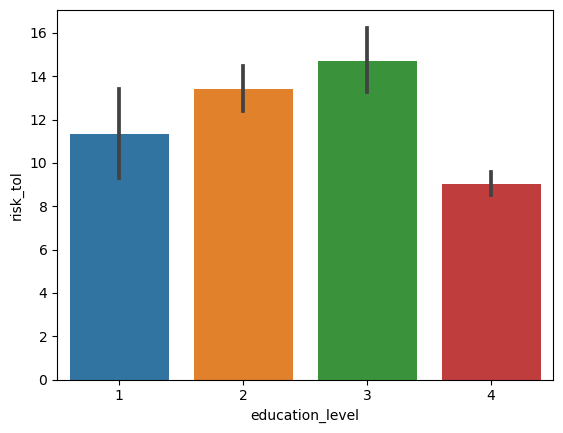

In [111]:
sns.barplot(df["education_level"] , df["risk_tol"])

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='age'>

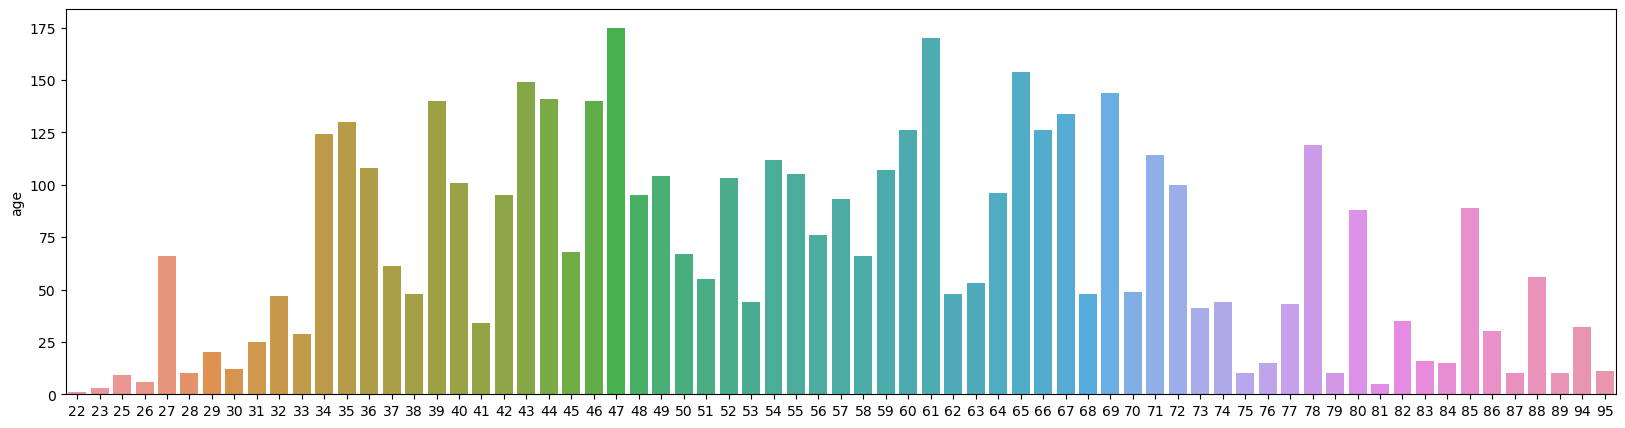

In [112]:
plt.figure(figsize=((20,5)))
sns.barplot(df["age"].unique(),df["age"].value_counts())

In [113]:
df["education_level"].value_counts()

4    2964
2     984
3     622
1     240
Name: education_level, dtype: int64

In [114]:
data=[]
for i in range (len(df["education_level"])):
    if df["education_level"][i] == 4 and df["age"][i]>=60 : data.append(1) 
    else : data.append(0)

In [115]:
df.insert(12 ,"eager" , data)

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eager', ylabel='risk_tol'>

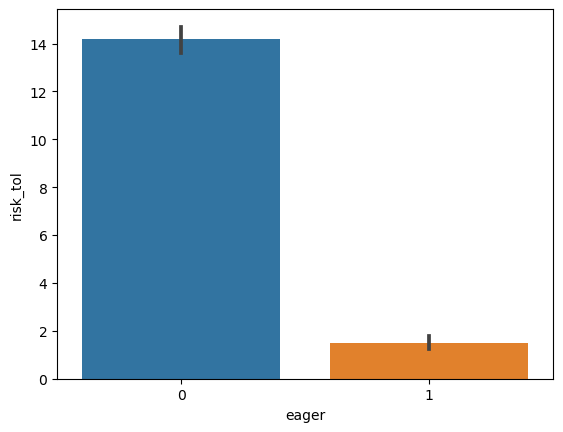

In [116]:
sns.barplot(df["eager"] , df["risk_tol"])

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='risk_tol'>

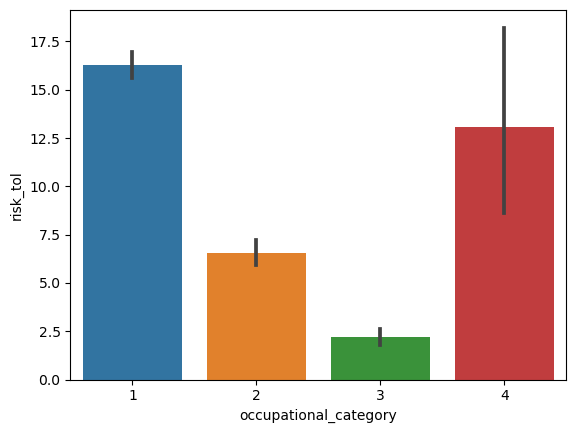

In [117]:
sns.barplot( df["occupational_category"] , df["risk_tol"] )

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='age'>

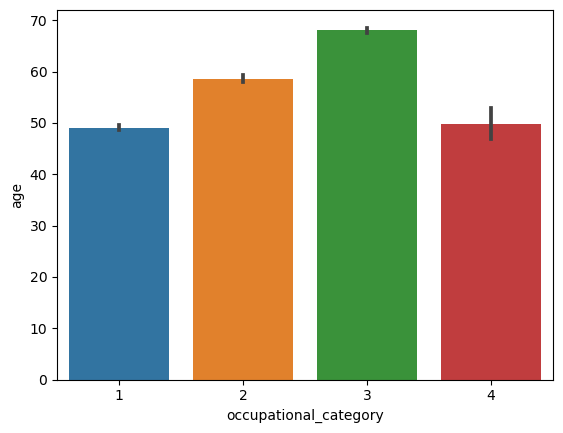

In [118]:
sns.barplot(  df["occupational_category"] , df["age"] )

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='income'>

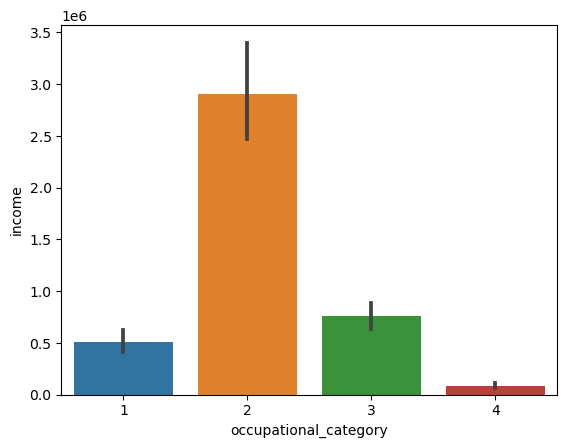

In [119]:
sns.barplot( df["occupational_category"], df["income"] )

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='net_worth'>

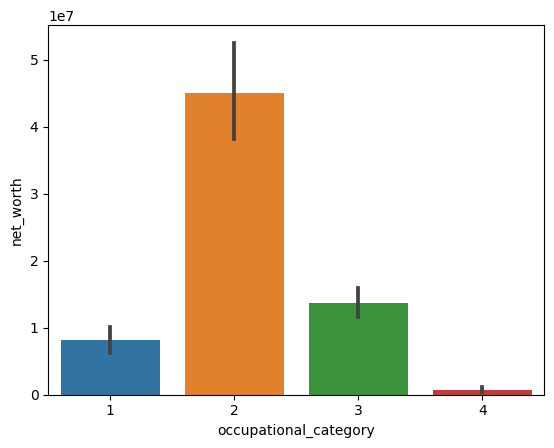

In [120]:
sns.barplot( df["occupational_category"], df["net_worth"] )

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupational_category', ylabel='wealth_saved'>

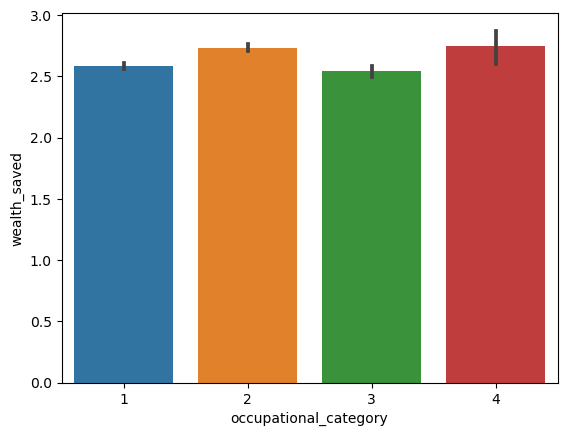

In [121]:
sns.barplot( df["occupational_category"], df["wealth_saved"] )

In [122]:
df["occupational_category"].value_counts()

1    2511
2    1237
3    1014
4      48
Name: occupational_category, dtype: int64

In [123]:
df.groupby(["occupational_category" , "age"]).age.agg(['sum'])

sum
occupational_category age     
1                     22    22
                      23   230
                      25    75
                      26   390
                      27   405
...                        ...
4                     53   265
                      55   385
                      56   168
                      57   171
                      63   567

[173 rows x 1 columns]

In [124]:
df["married_state"].value_counts()

1    3813
2     997
Name: married_state, dtype: int64

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married_state', ylabel='risk_tol'>

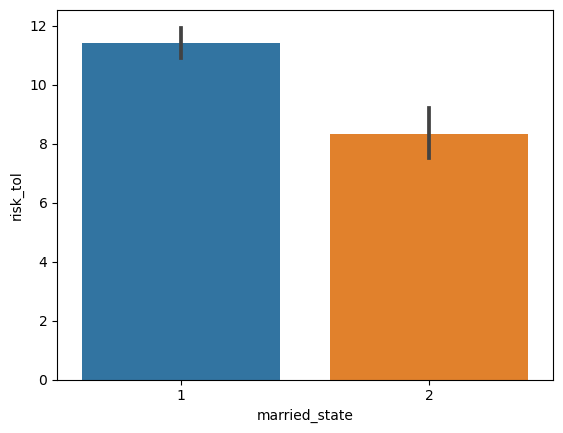

In [125]:
sns.barplot(df["married_state"] , df["risk_tol"])

e:\anaconda install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married_state', ylabel='income'>

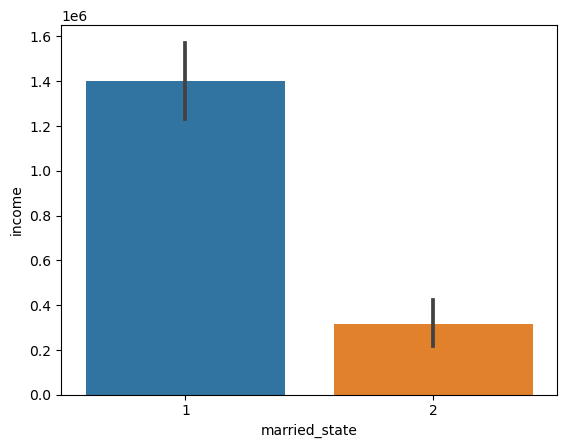

In [126]:
sns.barplot(df["married_state"] , df["income"])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4810 non-null   int64  
 1   education_level        4810 non-null   int64  
 2   married_state          4810 non-null   int64  
 3   no_of_kids             4810 non-null   int64  
 4   life_statge            4810 non-null   int64  
 5   occupational_category  4810 non-null   int64  
 6   income                 4810 non-null   float64
 7   risk                   4810 non-null   int64  
 8   wealth_saved           4810 non-null   int64  
 9   spend_amount           4810 non-null   int64  
 10  net_worth              4810 non-null   float64
 11  risk_tol               4810 non-null   float64
 12  eager                  4810 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 488.6 KB


In [128]:
x1 = df.drop(["risk_tol" ,"education_level"] , axis=1)
y1 = df["risk_tol"]

In [129]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [131]:
model = RandomForestRegressor()
model.fit(x1_train,y1_train)
model.score(x1_train,y1_train)

0.9901425687503541

In [132]:
model.score(x1_test,y1_test)

0.9756494980872693